In [2]:
data = read.csv('statcrunchusample.csv')

In [12]:
sum(data[data$Gender == 'Female',]$Hours == 40)

[1] 0

In [17]:
data[data$Gender == 'Female',]

,Gender,Class,Hours,Work,Loans,CC.Debt,FS
1,Female,2,14,0.0,0,2377,TRUE
2,Female,4,16,0.0,0,7040,TRUE
3,Female,2,9,28.5,7982,2481,FALSE
4,Female,2,16,0.0,0,0,TRUE
5,Female,3,8,33.0,13051,6146,FALSE
8,Female,1,14,19.0,3815,1294,TRUE
9,Female,3,11,18.5,14885,2292,FALSE
10,Female,3,17,14.0,11766,3636,TRUE
12,Female,1,18,0.0,4543,0,TRUE
13,Female,3,12,0.0,12066,4733,TRUE


In [36]:
#data$FS = data$Hours >= 12
#install.packages('plyr')
#install.packages(c('gridExtra','grid'))
#install.packages(c("dplyr", "knitr", "devtools", "DT", "xtable"))
#library('plyr')
library(dplyr)
library(knitr)
library(DT)
library(xtable)
library(devtools)
devtools::install_github("ismayc/pnwflights14")
library(pnwflights14)
data("flights", package = "pnwflights14")
#library(gridExtra)
#library(grid)

Warning message:
“package ‘devtools’ was built under R version 3.4.1”Skipping install of 'pnwflights14' from a github remote, the SHA1 (0a122d90) has not changed since last install.
  Use `force = TRUE` to force installation


In [54]:
n1p1 = sum(data[data$Gender == 'Female',]$FS)
n11mp1 = sum(data$Gender == 'Female')-n1p1
n2p2 = sum(data[data$Gender == 'Male',]$FS)
n21mp2 = sum(data$Gender == 'Male')-n2p2
c(n1p1,n11mp1,n2p2,n21mp2)
as.data.frame.matrix(table(data$Gender,mapvalues(data$FS,from=c(F,T),to=c('Part Time','Full Time'))))

[1] 482 103 333  82

,Full Time,Part Time
Female,482,103
Male,333,82


[1] 585.00000000 415.00000000   0.02152199   0.81500000   0.02492084
[6]   0.86361394   0.19390000


[1] 0.8636139

v1,v2
p1_hat=,0.823931623931624
p2_hat=,0.802409638554217
p1_hat-p2_hat=,0.021521985377407
Pooled Proportion =,0.815
Standard Error=,0.0249208405907002
Z-score =,0.863613941876361
P-value =,0.193900001372529


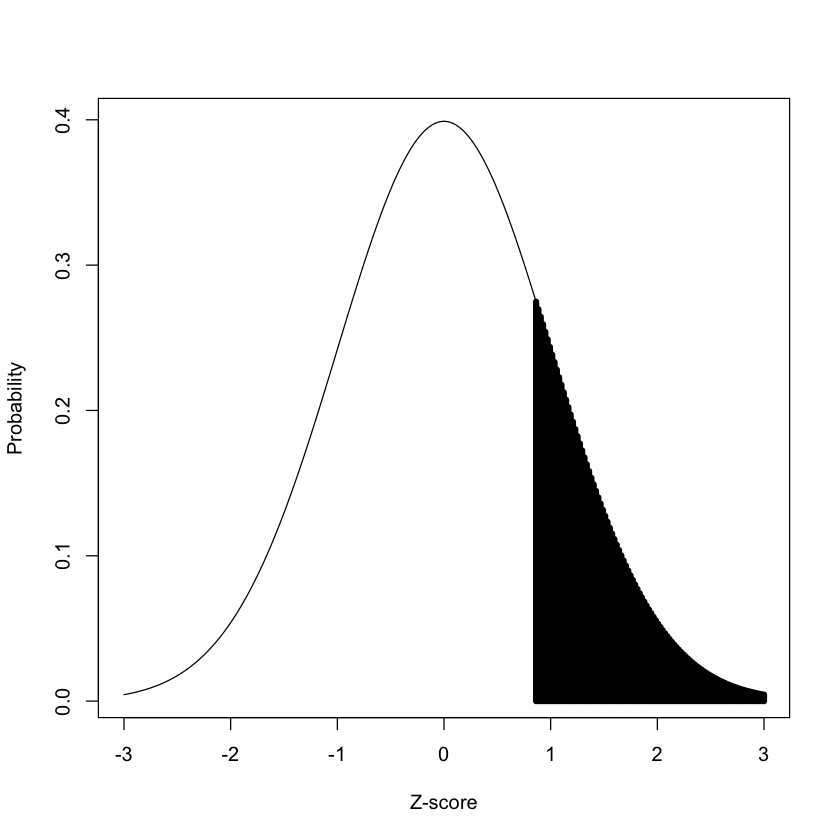

In [59]:
n1 = sum(data$Gender == 'Female')
n2 = sum(data$Gender == 'Male')
#print(c(n1p1,n2p2,p1,p2))
p1 = n1p1/n1
p2 = n2p2/n2
p_hat = (n1p1 + n2p2)/(n1+n2)
Standard_Error = (p_hat*(1-p_hat)*(1/n1 + 1/n2))^.5
z = ((p1-p2) - 0)/Standard_Error
P = 1-pnorm(z)
print(c(n1,n2,(p1-p2),p_hat,Standard_Error,z,P))
x = seq(-3,3,length=1000)
y = dnorm(x,mean=0,sd = 1)
plot(x,y,xlab='Z-score',ylab='Probability',type='l',lwd=1)
for (i in seq(z,3.,length=100)) {
  lines(c(i,i),c(0,dnorm(i,mean=0,sd=1)),lwd=5)
}
z
a=c('p1_hat=',p1,'p2_hat=',p2,'p1_hat-p2_hat=', p1-p2, 'Pooled Proportion = ',p_hat,'Standard Error=',Standard_Error, 'Z-score =',z,'P-value = ', P)
data.frame(v1=a[seq(1,length(a),2)],v2=a[seq(2,length(a),2)])

[1] -0.02767367  0.07071764


v1,v2
Z-score=,1.95996398454005
Standard_Error=,0.0251002862101374
CI=,"[-0.0276736715961097,0.0707176423509237]"


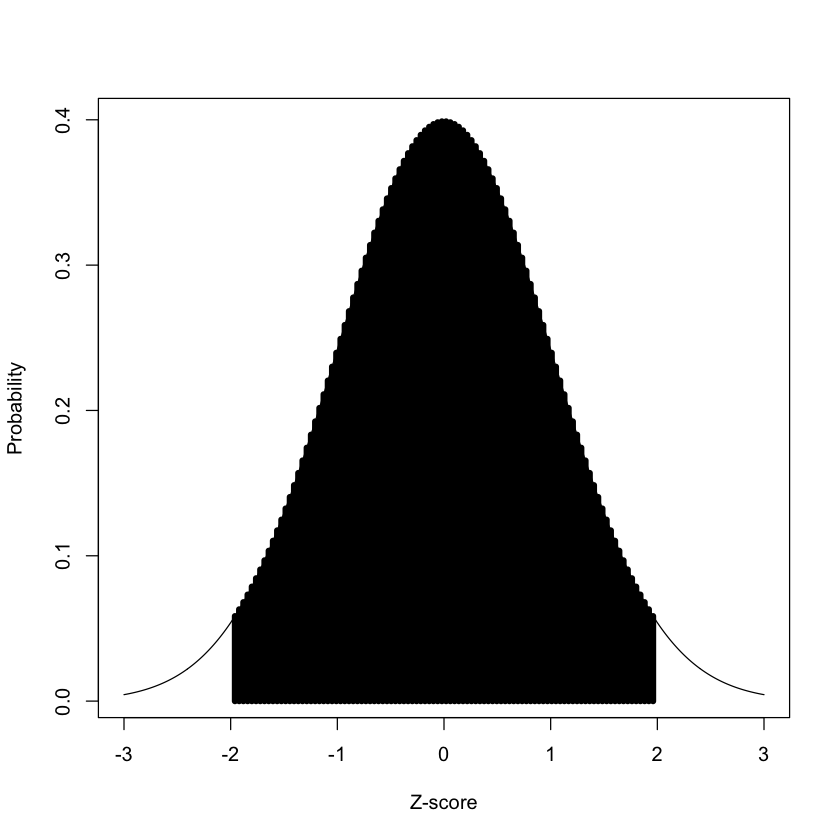

In [65]:
z = qnorm(.975)
Standard_Error = (p1*(1-p1)/n1+p2*(1-p2)/n2)^.5
CI = c(p1-p2 - z*Standard_Error,p1-p2 + z*Standard_Error)
x = seq(-3,3,length=1000)
y = dnorm(x,mean=0,sd = 1)
plot(x,y,xlab='Z-score',ylab='Probability',type='l',lwd=1)
for (i in seq(-z,z,length=100)) {
  lines(c(i,i),c(0,dnorm(i,mean=0,sd=1)),lwd=5)
}
print(CI)
a=c('Z-score=',z,'Standard_Error=',Standard_Error,'CI=',paste(c('[',CI[1],',',CI[2],']'),collapse=''))
data.frame(v1=a[seq(1,length(a),2)],v2=a[seq(2,length(a),2)])